In [7]:
import os
import pandas as pd

# Get the current working directory
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")

# Load the CSV file from the data directory
df = pd.read_csv('../data/user_data.csv')

# Display the first few rows to verify the data loaded correctly
df.head()

Current working directory: C:\Users\Abdullah\OneDrive\Documents\NXU\Programming using Python and R\Final Project\healthcare_survey\analysis


,age,gender,total_income,utilities_expense,entertainment_expense,school_fees_expense,shopping_expense,healthcare_expense
0,27,male,2000.0,1000.0,10.0,215.0,200.0,300.0
1,19,female,500.0,100.0,100.0,90.0,100.0,50.0
2,22,male,2500.0,900.0,200.0,500.0,300.0,700.0
3,23,female,1300.0,400.0,30.0,300.0,400.0,120.0
4,45,male,3000.0,1000.0,300.0,600.0,100.0,1000.0


In [8]:
# Check the data types and basic info
df.info()

# Summary statistics
df.describe()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    20 non-null     int64  
 1   gender                 20 non-null     object 
 2   total_income           20 non-null     float64
 3   utilities_expense      20 non-null     float64
 4   entertainment_expense  20 non-null     float64
 5   school_fees_expense    20 non-null     float64
 6   shopping_expense       20 non-null     float64
 7   healthcare_expense     20 non-null     float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.4+ KB


age                      0
gender                   0
total_income             0
utilities_expense        0
entertainment_expense    0
school_fees_expense      0
shopping_expense         0
healthcare_expense       0
dtype: int64

In [9]:
# Identify expense columns 
expense_columns = [col for col in df.columns if ('expense' in col or 'amount' in col)]
print(f"Expense categories: {expense_columns}")

# Fill missing expense values with 0
df[expense_columns] = df[expense_columns].fillna(0)

# Create an age group column for better analysis
def categorize_age(age):
    if age < 25:
        return "18-24"
    elif age < 35:
        return "25-34"
    elif age < 45:
        return "35-44"
    elif age < 55:
        return "45-54"
    elif age < 65:
        return "55-64"
    else:
        return "65+"

df['age_group'] = df['age'].apply(categorize_age)

# Calculate total expenses per person
df['total_expenses'] = df[expense_columns].sum(axis=1)

Expense categories: ['utilities_expense', 'entertainment_expense', 'school_fees_expense', 'shopping_expense', 'healthcare_expense']


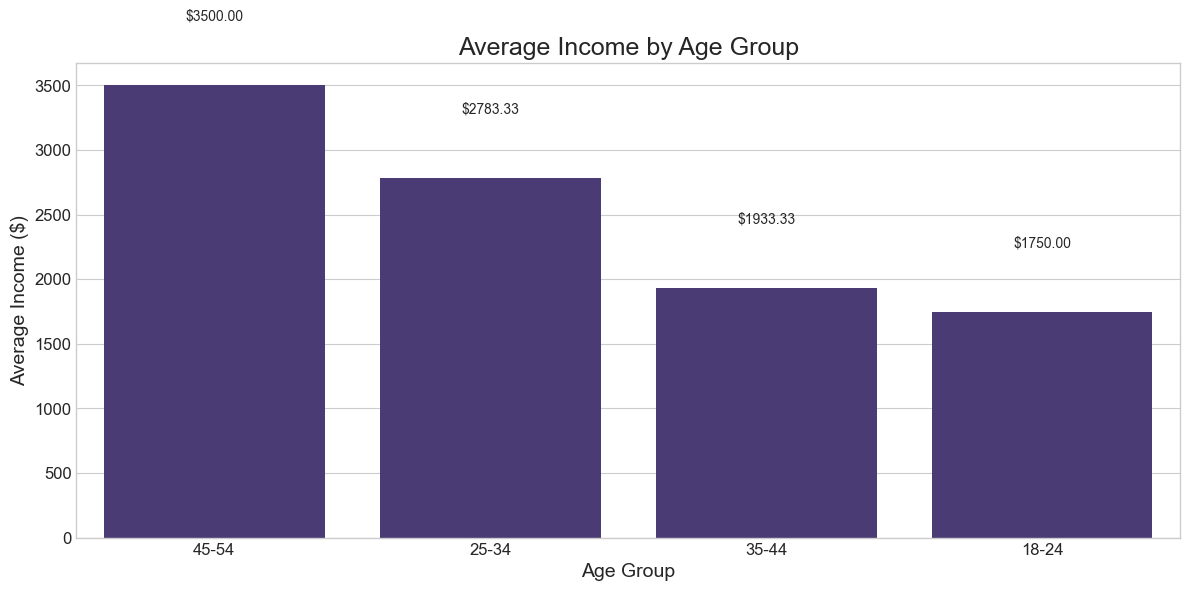

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')  
sns.set_palette('viridis')

# Group by age_group and calculate average income
income_by_age = df.groupby('age_group')['total_income'].mean().reset_index()
income_by_age = income_by_age.sort_values('total_income', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='age_group', y='total_income', data=income_by_age, order=income_by_age['age_group'])
plt.title('Average Income by Age Group', fontsize=18)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Average Income ($)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add values on top of bars
for i, v in enumerate(income_by_age['total_income']):
    ax.text(i, v + 500, f"${v:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.savefig('../data/income_by_age.png', dpi=300, bbox_inches='tight')
plt.show()

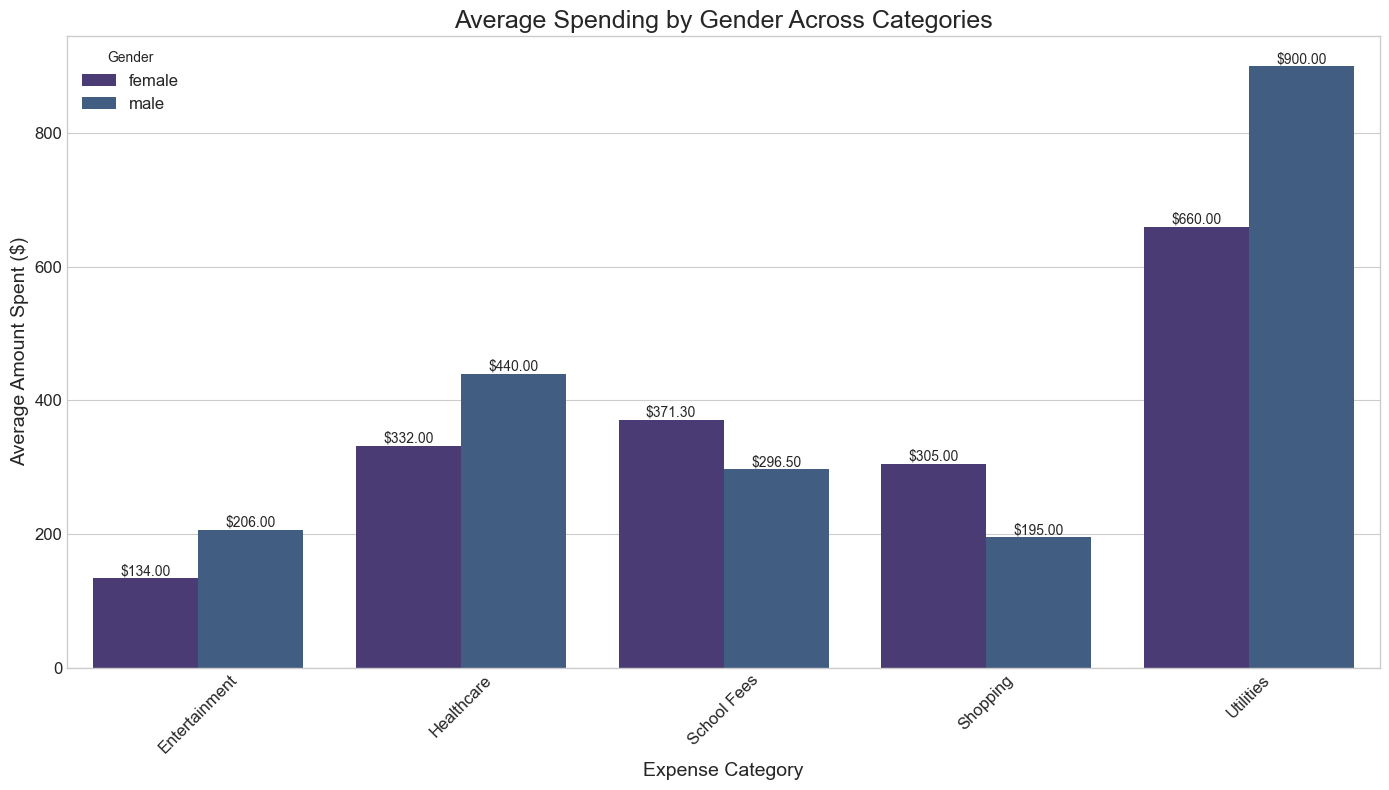

In [11]:
# Make sure all expense columns are defined correctly based on your actual data
expense_df = df.melt(
    id_vars=['gender'], 
    value_vars=expense_columns,
    var_name='category',
    value_name='amount'
)

# Clean category names 
expense_df['category'] = expense_df['category'].str.replace('_expense', '').str.replace('_amount', '')
expense_df['category'] = expense_df['category'].str.replace('_', ' ').str.title()

# Calculate average spending by gender and category
gender_spending = expense_df.groupby(['gender', 'category'])['amount'].mean().reset_index()

plt.figure(figsize=(14, 8))
ax = sns.barplot(x='category', y='amount', hue='gender', data=gender_spending)
plt.title('Average Spending by Gender Across Categories', fontsize=18)
plt.xlabel('Expense Category', fontsize=14)
plt.ylabel('Average Amount Spent ($)', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, title='Gender')

# Add values on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='$%.2f', fontsize=10)

plt.tight_layout()
plt.savefig('../data/gender_spending.png', dpi=300, bbox_inches='tight')
plt.show()

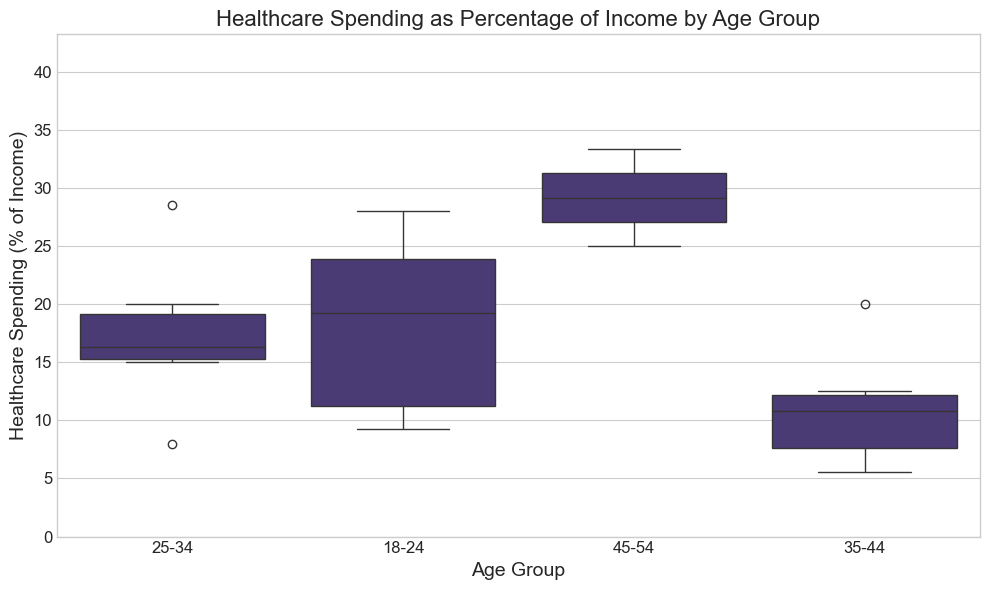

In [12]:
# Focus on healthcare spending
healthcare_col = [col for col in expense_columns if 'health' in col.lower()]
if healthcare_col:
    # Calculate healthcare spending as percentage of income
    healthcare_col_name = healthcare_col[0]  # Get the actual column name
    df['healthcare_percent'] = (df[healthcare_col_name] / df['total_income']) * 100
    
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='age_group', y='healthcare_percent', data=df)
    plt.title('Healthcare Spending as Percentage of Income by Age Group', fontsize=16)
    plt.xlabel('Age Group', fontsize=14)
    plt.ylabel('Healthcare Spending (% of Income)', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylim(0, df['healthcare_percent'].quantile(0.95) * 1.5)  # Limit y-axis to avoid outliers
    
    plt.tight_layout()
    plt.savefig('../data/healthcare_spending_percent.png', dpi=300, bbox_inches='tight')
    plt.show()